## Linearly separable data:

In [27]:
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

from sklearn.model_selection import train_test_split

from scipy.stats import multivariate_normal

In [30]:
data = np.loadtxt('36_ls.txt')

Dividing data into 70% for training, 20% for validation and 10% for testing

In [20]:
cA = data[:500]
cB = data[500:1000]
cC = data[1000:]

cA_train,cA_test,cB_train,cB_test,cC_train,cC_test = train_test_split(cA,cB,cC,test_size=0.1, random_state=42)
cA_train,cA_valid,cB_train,cB_valid,cC_train,cC_valid = train_test_split(cA_train,cB_train,cC_train,test_size=0.22, random_state=42)

In [21]:
cA.shape

(500, 2)

In [22]:
mu_A = np.vstack((np.mean(cA_train[:,0]),np.mean(cA_train[:,1])))
mu_B = np.vstack((np.mean(cB_train[:,0]),np.mean(cB_train[:,1])))
mu_C = np.vstack((np.mean(cC_train[:,0]),np.mean(cC_train[:,1])))

cov_A = np.cov(cA_train[:,0],cA_train[:,1])
cov_B = np.cov(cB_train[:,0],cB_train[:,1])
cov_C = np.cov(cC_train[:,0],cC_train[:,1])

In [23]:
def l(x1,x2,mu,cov):
    x = np.vstack((x1,x2))
    return (1/(2*np.pi*np.linalg.det(cov)**0.5)* \
    (np.e**(-0.5*np.matmul(np.matmul(np.transpose((x-mu)),np.linalg.inv(cov)),(x-mu)))) ).reshape(1) #

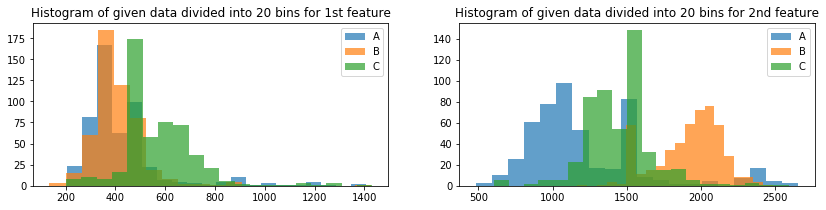

In [24]:
plt.figure(figsize=(14, 3))
plt.subplot(1,2,1)
plt.hist(cA[:,0],20, alpha=0.7, label='A')
plt.hist(cB[:,0],20, alpha=0.7, label='B')
plt.hist(cC[:,0],20, alpha=0.7, label='C')
plt.title('Histogram of given data divided into 20 bins for 1st feature')
plt.legend()

plt.subplot(1,2,2)
plt.hist(cA[:,1],20, alpha=0.7, label='A')
plt.hist(cB[:,1],20, alpha=0.7, label='B')
plt.hist(cC[:,1],20, alpha=0.7, label='C')
plt.title('Histogram of given data divided into 20 bins for 2nd feature')
plt.legend()
plt.show()

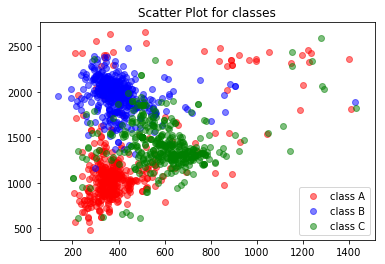

In [25]:
plt.scatter(cA[:,0], cA[:,1], c='red', alpha=0.5, label='class A')
plt.scatter(cB[:,0], cB[:,1], c='blue', alpha=0.5, label='class B')
plt.scatter(cC[:,0], cC[:,1], c='green', alpha=0.5, label='class C')
plt.title("Scatter Plot for classes")
plt.legend()
plt.show()

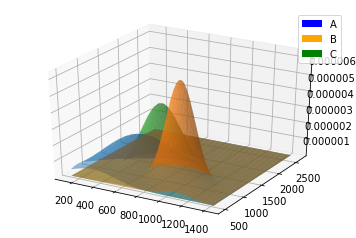

In [28]:
X_axis = np.linspace(min(data[:,0]),max(data[:,0]),100)
Y_axis = np.linspace(min(data[:,1]),max(data[:,1]),100)

z1 = []
for x in X_axis:
    temp = []
    for y in Y_axis:
        temp.append(l(x,y,mu_A,cov_A))
    z1.append(temp)
    
z2 = []
for x in X_axis:
    temp = []
    for y in Y_axis:
        temp.append(l(x,y,mu_B,cov_B))
    z2.append(temp)

z3 = []
for x in X_axis:
    temp = []
    for y in Y_axis:
        temp.append(l(x,y,mu_C,cov_C))
    z3.append(temp)

z1 = np.array(z1).reshape(100,100)
z2 = np.array(z2).reshape(100,100)
z3 = np.array(z3).reshape(100,100)

x,y = np.meshgrid(X_axis, Y_axis)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(x, y, z1, linewidth=0, alpha=0.5)
blue_proxy = plt.Rectangle((0, 0), 1, 1, fc="b")
ax.plot_surface(x, y, z2, linewidth=0, alpha=0.5)
orange_proxy = plt.Rectangle((0, 0), 1, 1, fc="orange")
ax.plot_surface(x, y, z3, linewidth=0, alpha=0.5)
green_proxy = plt.Rectangle((0, 0), 1, 1, fc="g")
ax.legend([blue_proxy,orange_proxy,green_proxy],['A','B','C'])
plt.show()

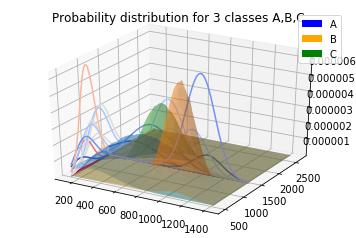

In [29]:
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(x, y, z1, rstride=5, cstride=5, alpha=0.3, label = 'A')
cset = ax.contour(x, y, z1, zdir='z', offset=-0.01, cmap=cm.coolwarm)
cset = ax.contour(x, y, z1, zdir='x', offset=X_axis[0], cmap=cm.coolwarm)
cset = ax.contour(x, y, z1, zdir='y', offset=X_axis[-1], cmap=cm.coolwarm)

ax.plot_surface(x, y, z2, rstride=5, cstride=5, alpha=0.3, label = 'B')
cset = ax.contour(x, y, z2, zdir='z', offset=-0.01, cmap=cm.coolwarm)
cset = ax.contour(x, y, z2, zdir='x', offset=X_axis[0], cmap=cm.coolwarm)
cset = ax.contour(x, y, z2, zdir='y', offset=X_axis[-1], cmap=cm.coolwarm)

ax.plot_surface(x, y, z3, rstride=5, cstride=5, alpha=0.3, label = 'C')
cset = ax.contour(x, y, z3, zdir='z', offset=-0.01, cmap=cm.coolwarm)
cset = ax.contour(x, y, z3, zdir='x', offset=X_axis[0], cmap=cm.coolwarm)
cset = ax.contour(x, y, z3, zdir='y', offset=X_axis[-1], cmap=cm.coolwarm)

plt.title('Probability distribution for 3 classes A,B,C')
#legends
blue_proxy = plt.Rectangle((0, 0), 1, 1, fc="b")
orange_proxy = plt.Rectangle((0, 0), 1, 1, fc="orange")
green_proxy = plt.Rectangle((0, 0), 1, 1, fc="g")
ax.legend([blue_proxy,orange_proxy,green_proxy],['A','B','C'])

plt.show()